PROJECT NAME : E-COMMERCE CUSTOMER SEGMENTATION

Abstract:

A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the
companies can group the customers; based on their activity on the ecommerce
site. This grouping can be done by applying different criteria like
previous orders, mostly searched brands and so on.

Problem Statement:

Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest.

Scope:
    
● Analyzing the existing customer data and getting valuable insights
  about the purchase pattern
● Data pre-processing including missing value treatment
● Segmenting customer based on the optimum number of clusters (‘k’)
  with the help of silhouette score


Step 1 : Installing and Importing the required packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [12]:
pip install openpyxl

You should consider upgrading via the 'C:\Users\cyril\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Step 2 : Reading the Data

In [2]:
os.chdir(r'C:\cyrdocs\IITM-DS\Final Project')

In [3]:
cust_df = pd.read_excel('cust_data.xlsx')
cust_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Step 3 : Analyzing the Customer Data

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
cust_df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Step 4 : Cleaning the Data and Missing Values treatment

In [6]:
cust_df.drop(columns = ['Cust_ID'], inplace = True)

In [7]:
mv=cust_df.isnull().sum()
mv

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [8]:
cust_df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [9]:
cust_df['Gender'].fillna('Others', inplace = True)

In [10]:
cust_df['Gender'].unique()

array(['M', 'F', 'Others'], dtype=object)

Step 5 : Encoding the Data

In [11]:
cust_df2=pd.get_dummies(cust_df,columns=["Gender"])
cust_df2.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Gender_Others
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [12]:
cust_df2.shape

(30000, 39)

In [13]:
mv2=cust_df2.isnull().sum()
mv2

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

Step 6 : K Means Clustering with Silhouette Score and Visualizations

In [14]:
# Only brand names will be used for segmentation. We will drop Orders and Gender columns
KM_data=cust_df2.drop(['Orders','Gender_F','Gender_M','Gender_Others'],axis=1)

In [15]:
KM_data.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [16]:
scaler=StandardScaler().fit(KM_data)
KM_data=scaler.transform(KM_data)

In [17]:
X=pd.DataFrame(KM_data,columns=cust_df2.columns[1:36])
X.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)


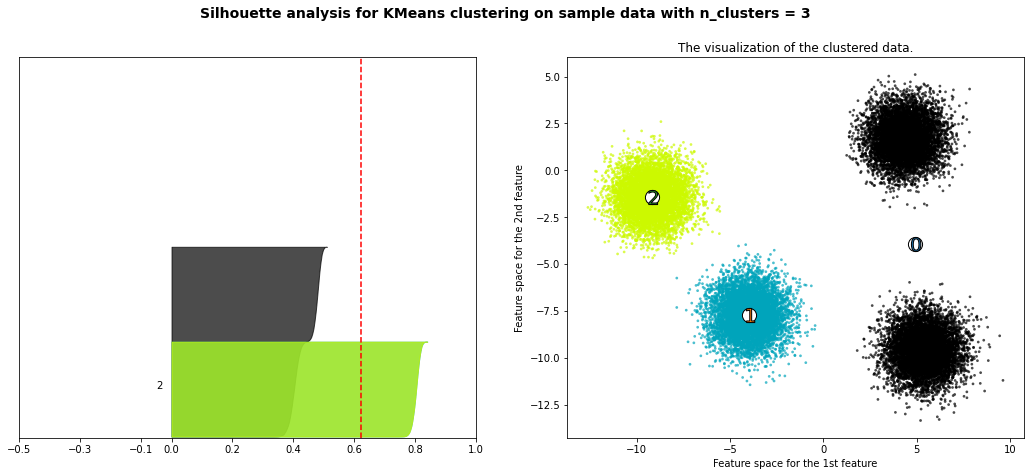

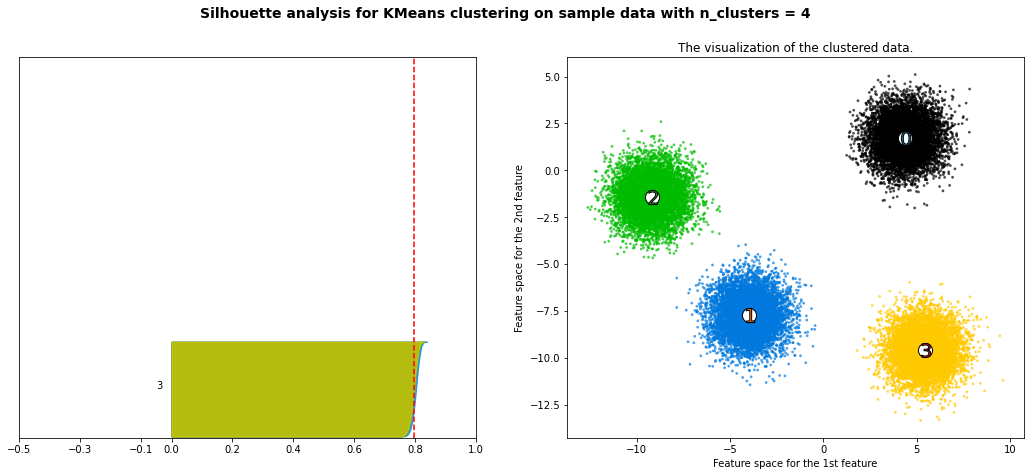

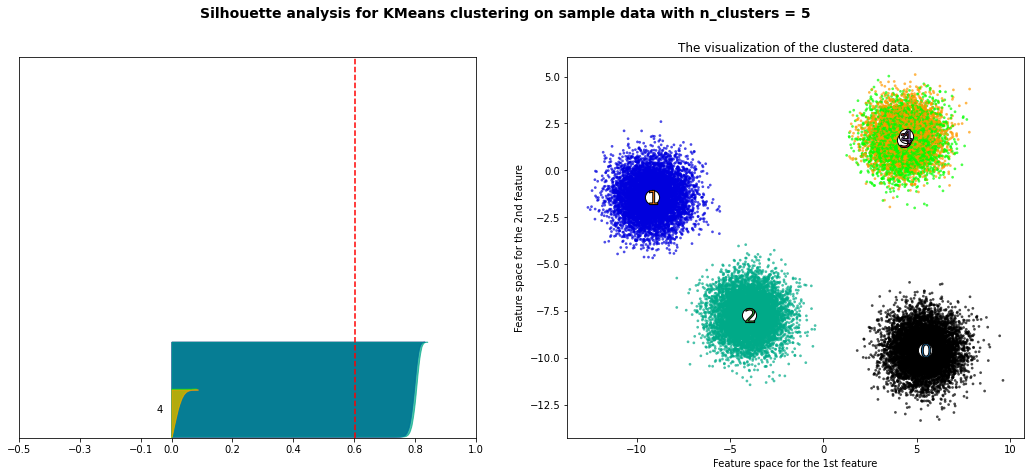

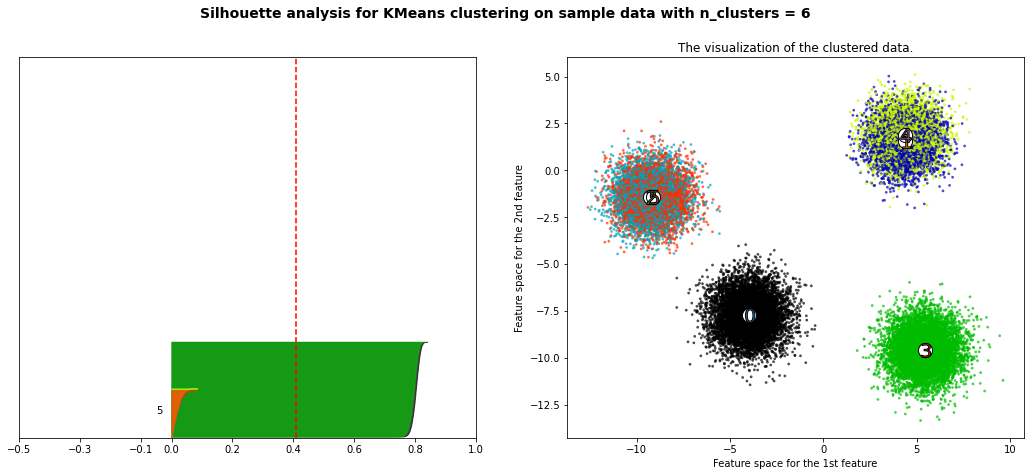

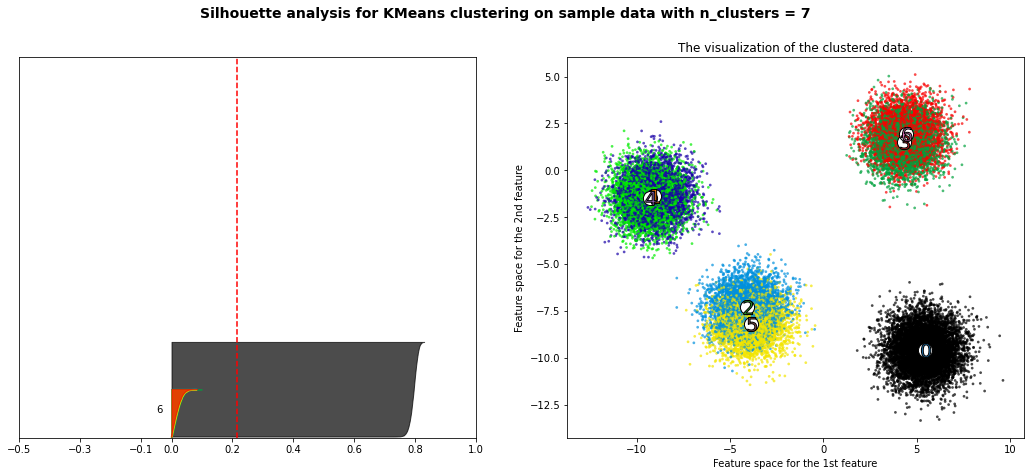

In [18]:
X, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(3,8):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 20])
    km=KMeans(n_clusters=n_clusters, random_state=10)
    result=km.fit_predict(X)
       
    score=silhouette_score(X,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, result)

    y_lower = 100
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[result == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )


    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, -0.3, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(result.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    # Labeling the clusters
    centers = km.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=200, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [19]:
km2=KMeans(n_clusters=4,random_state=10)
km2.fit(X)

KMeans(n_clusters=4, random_state=10)

Step 7 : Assign Cluster Information to Customer Data for Segmentation

In [20]:
cust_df3=cust_df2.copy(deep=True)
cust_df3['cluster']=km2.labels_

In [21]:
cust_df3.head(20)

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Gender_Others,cluster
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3
6,6,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
7,9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
8,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# check the size of each cluster
np.unique(km2.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([7500, 7500, 7500, 7500], dtype=int64))

In [23]:
center=pd.DataFrame(km2.cluster_centers_,columns=cust_df3.columns[1:36])
center.head()
# km2.cluster_centers

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,4.379543,1.721561,-9.253141,-2.976846,1.275248,-4.013101,0.247002,3.465931,-6.822483,-8.983865,...,-5.048869,0.845788,-5.464405,-2.385907,8.449809,8.511175,1.315130,0.664953,-9.692382,9.557663
1,-3.970695,-7.716260,6.578182,-9.070186,2.533719,0.952938,6.385118,-6.026121,7.124559,-2.947028,...,1.965043,8.061645,0.664408,1.795159,-9.195869,-2.849144,-8.411960,-3.884682,-3.369298,5.499859
2,-9.194634,-1.410014,-3.710544,2.722765,-3.073391,-9.125543,7.585778,5.266300,7.565161,-1.634303,...,-0.083249,9.535110,-1.208170,-3.628217,0.394000,1.566340,7.076106,-8.641537,-0.716133,5.643070
3,5.425258,-9.576029,2.665978,4.968834,-0.036574,-5.502534,-6.042430,5.219049,-6.640392,-8.234134,...,-1.322097,2.358541,0.236452,3.021425,2.011110,6.118942,0.410923,8.172917,-3.629746,-8.187937


Step 8 : Statistical Analysis of the Clusters

In [24]:
# Statistical Analysis of Cluster 1

var_cluster_1=pd.DataFrame(sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10])[1]
var_cluster_1

0              Kraft
1         Forever 21
2          Hollister
3    Hewlett Packard
4            Siemens
5          Pop Chips
6             Jordan
7               Vans
8           Burberry
9             Huawei
Name: 1, dtype: object

In [25]:
cust_df3[['Orders','Gender_F','Gender_M','Gender_Others','cluster']][cust_df3.cluster==0].describe()

,Orders,Gender_F,Gender_M,Gender_Others,cluster
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,4.182800,0.736400,0.171600,0.092000,0.0
std,3.620598,0.440614,0.377058,0.289045,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,1.000000,0.0


In [26]:
# Statistical Analysis of Cluster 2

var_cluster_2=pd.DataFrame(sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10])[1]
var_cluster_2

0          Compaq
1          Huawei
2            Dior
3           Fendi
4            Fila
5         Samsung
6        Burberry
7    J.M. Smucker
8        Wrangler
9           Kraft
Name: 1, dtype: object

In [27]:
cust_df3[['Orders','Gender_F','Gender_M','Gender_Others','cluster']][cust_df3.cluster==1].describe()

,Orders,Gender_F,Gender_M,Gender_Others,cluster
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,4.088267,0.735333,0.173867,0.090800,1.0
std,3.552467,0.441185,0.379020,0.287344,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.000000,1.0


In [28]:
# Statistical Analysis of Cluster 3

var_cluster_3=pd.DataFrame(sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10])[1]
var_cluster_3

0    Burberry
1        Dior
2    Wrangler
3        Fila
4    Colavita
5       Kraft
6        Vans
7        Asus
8         H&M
9       Fendi
Name: 1, dtype: object

In [29]:
cust_df3[['Orders','Gender_F','Gender_M','Gender_Others','cluster']][cust_df3.cluster==2].describe()

,Orders,Gender_F,Gender_M,Gender_Others,cluster
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,4.199200,0.731200,0.174133,0.094667,2.0
std,3.605873,0.443365,0.379249,0.292773,0.0
min,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,0.000000,0.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,1.000000,2.0


In [30]:
# Statistical Analysis of Cluster 4

var_cluster_4=pd.DataFrame(sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10])[1]
var_cluster_4

0    Dairy Queen
1      Pop Chips
2      Microsoft
3         Pladis
4     Forever 21
5         Jordan
6           Vans
7           Asus
8        Siemens
9        Juniper
Name: 1, dtype: object

In [31]:
cust_df3[['Orders','Gender_F','Gender_M','Gender_Others','cluster']][cust_df3.cluster==3].describe()

,Orders,Gender_F,Gender_M,Gender_Others,cluster
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,4.208933,0.737600,0.176667,0.085733,3.0
std,3.581367,0.439968,0.381412,0.279989,0.0
min,0.000000,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,1.000000,3.0


Conclusion:

After using the Silhouette Score method and analyzing, we have found that k=4 is the optimal score. Hence we have segmented the customer data into 4 clusters. We have applied K Means algorithm with 4 clusters and classified the customers under four categories namely, Groceries, Apparels, Electronics & Appliances, Mobiles & Computers. Each cluster gives us information on the market trend and the customer interests. The segmentation can help e-commerce organizations in marketing their products to specific set of customers and provide recommendations to customers on their mobile apps or websites based on their specific interests.